In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob


%matplotlib inline
sns.set_style("darkgrid")

<h2 style="color:red">Carregando arquivos</h2>

<p>Carregando todos os arquivos na pasta dados e concatenando em um DataFrame</p>

In [2]:
path = r'data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

dados = pd.concat(li, axis=0, ignore_index=True)

<h4>Fazendo uma pré analise dos dados recuperados</h4>

In [3]:
dados.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [4]:
dados.shape

(420768, 18)

<p>Como o dataset é muito grande, vamos trabalhar com um sample, ou seja, vamos pegar aleatóriamente várias linhas do dataset</p>

In [5]:
dados = dados.sample(50000, random_state=1990)

<p>Vamos fazer algumas analises descritivas sobre os dados</p>

In [6]:
dados.describe().round(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,50000.00,50000.00,50000.00,50000.00,50000.00,48922.00,49197.00,48901.00,48466.00,47487.00,48357.00,49953.00,49955.00,49953.00,49956.00,49967.00
mean,17476.48,2014.66,6.53,15.75,11.49,79.31,103.92,15.71,50.37,1223.92,57.69,13.58,1010.76,2.50,0.06,1.73
std,10111.01,1.17,3.44,8.80,6.92,80.51,91.34,21.35,34.90,1156.45,56.48,11.44,10.47,13.83,0.77,1.25
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,2.00,100.00,0.21,-16.80,983.00,-35.30,0.00,0.00
25%,8721.00,2014.00,4.00,8.00,5.00,20.00,35.00,2.57,23.00,500.00,11.00,3.20,1002.30,-9.00,0.00,0.90
50%,17519.00,2015.00,7.00,16.00,11.00,55.00,82.00,7.00,43.00,900.00,45.00,14.60,1010.40,3.20,0.00,1.40
75%,26184.50,2016.00,10.00,23.00,17.00,111.00,145.00,19.00,71.00,1500.00,82.00,23.30,1019.00,15.10,0.00,2.20
max,35064.00,2017.00,12.00,31.00,23.00,808.00,999.00,245.00,277.00,10000.00,1071.00,41.60,1042.80,28.80,46.40,12.80


<h3> Criando novas colunas de acordo com as estações</h3>
<p>Vamos criar algumas novas colunas que indicam de forma boleana a estação</p>

In [7]:
stations = pd.get_dummies(dados['station'])
stations.head()

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
310625,0,0,0,0,0,0,0,0,0,0,0,1
65907,0,0,0,1,0,0,0,0,0,0,0,0
27145,0,0,0,0,0,1,0,0,0,0,0,0
57091,0,0,0,1,0,0,0,0,0,0,0,0
134221,0,0,1,0,0,0,0,0,0,0,0,0


<h4 id="heatmap">Criando um mapa de calor com os dados dados faltantes</h4>
    
<p>Existem alguns dados faltantes na coluna PM2.5, vamos tentar tratar estes dados de forma que eles sejam eliminados ou substituidos por algum valor</p>

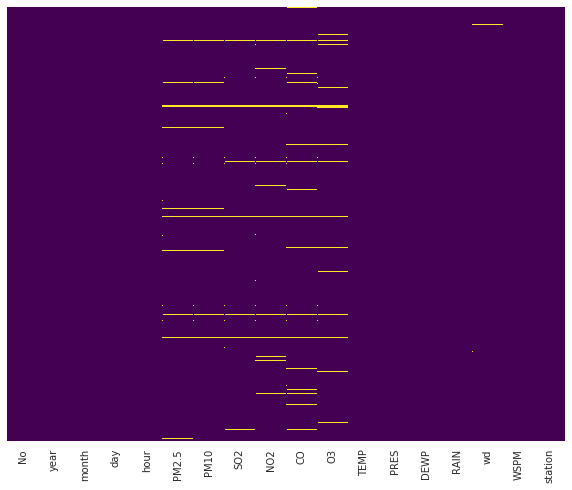

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(dados.isnull(), yticklabels=False, cbar=False, cmap='viridis')

obs: Pontos amarelos no mapa indicam dados faltando.

In [9]:
print("Quantidade de dados sobre PM2.5 que estão faltando: {}".format(dados[dados['PM2.5'].isnull()].shape[0]))

Quantidade de dados sobre PM2.5 que estão faltando: 1078


<p> Como existem várias stations e as médias das medias são diferentes para cada uma, vou preencher os PM2.5 faltantes com a média de sua station</p>

In [10]:
dados_pm25_station = dados.groupby("station")['PM2.5'].mean()
dados_pm25_station.round(2)

station
Aotizhongxin     80.38
Changping        70.69
Dingling         66.08
Dongsi           86.54
Guanyuan         80.88
Gucheng          82.48
Huairou          68.70
Nongzhanguan     84.82
Shunyi           79.36
Tiantan          82.75
Wanliu           83.59
Wanshouxigong    85.37
Name: PM2.5, dtype: float64

In [11]:
dados.loc[dados['PM2.5'].isnull(), 'PM2.5'] = dados[dados['PM2.5'].isnull()]['station'].apply(lambda x: dados_pm25_station[x].round(4))

<p>Verificando o mapa de calor novamente, podemos ver que não existem mais dados nulos para PM2.5</p>

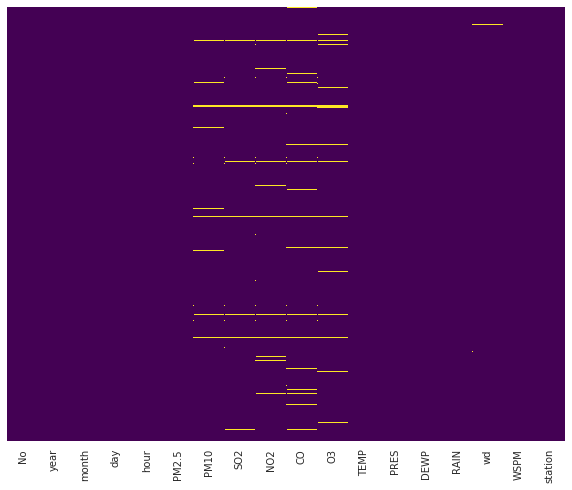

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dados.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<p>Vamos fazer o mesmo com as outras medições</p>

In [13]:
dados.loc[dados['PM10'].isnull(), 'PM10'] = dados[dados['PM10'].isnull()]['station'].apply(lambda x: dados.groupby("station")['PM10'].mean()[x].round(4))
dados.loc[dados['SO2'].isnull(), 'SO2'] = dados[dados['SO2'].isnull()]['station'].apply(lambda x: dados.groupby("station")['SO2'].mean()[x].round(4))
dados.loc[dados['NO2'].isnull(), 'NO2'] = dados[dados['NO2'].isnull()]['station'].apply(lambda x: dados.groupby("station")['NO2'].mean()[x].round(4))
dados.loc[dados['CO'].isnull(), 'CO'] = dados[dados['CO'].isnull()]['station'].apply(lambda x: dados.groupby("station")['CO'].mean()[x].round(4))
dados.loc[dados['O3'].isnull(), 'O3'] = dados[dados['O3'].isnull()]['station'].apply(lambda x: dados.groupby("station")['O3'].mean()[x].round(4))

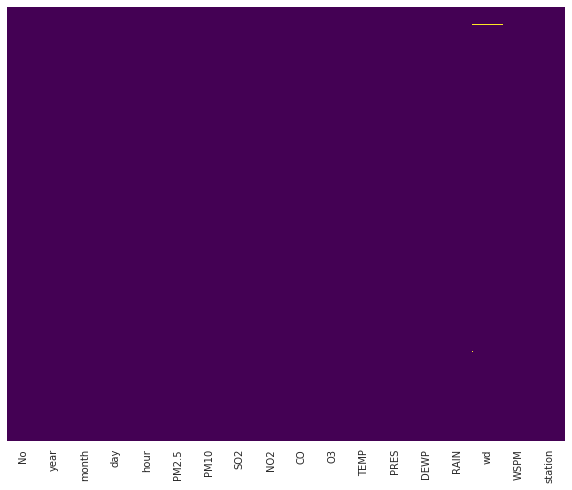

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(dados.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<p>Pronto, conseguimos elimitar os valores faltantes dos dados de observação das emissões, agora vamos analisar</p>

Verificando a distribuição dos dados que queremos fazer a predição, vemos que existe uma Assimetria a direita

In [15]:
from sklearn.preprocessing import StandardScaler

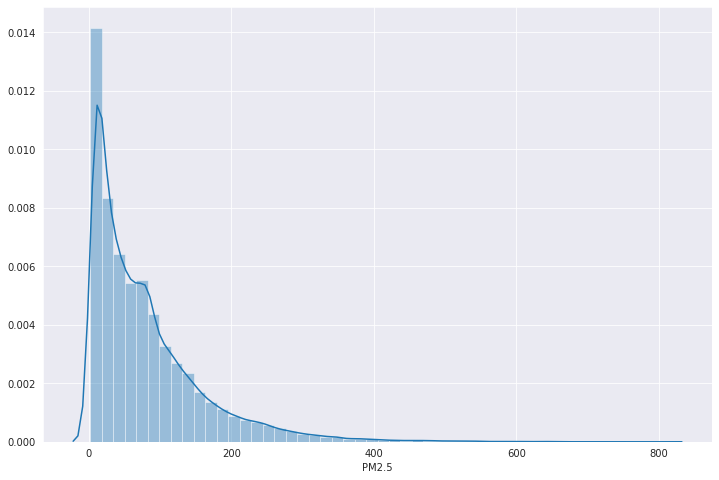

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(dados['PM2.5'])

<h4>Mostrando a média de emissão de dos gases durante os anos</h4>

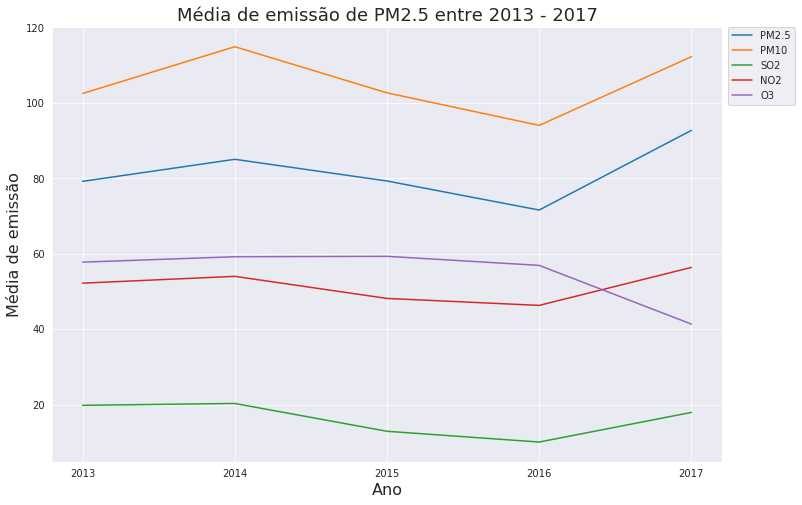

In [17]:
plt.figure(figsize=(12,8))
sns.lineplot(x="year", y="PM2.5", data=dados, ci=None, sizes=(.3, 2.5), label="PM2.5", palette="husl")
sns.lineplot(x="year", y="PM10", data=dados, ci=None, sizes=(.3, 2.5), label="PM10", palette="husl")
sns.lineplot(x="year", y="SO2", data=dados, ci=None, sizes=(.3, 2.5), label="SO2", palette="husl")
sns.lineplot(x="year", y="NO2", data=dados, ci=None, sizes=(.3, 2.5), label="NO2", palette="husl")
sns.lineplot(x="year", y="O3", data=dados, ci=None, sizes=(.3, 2.5), label="O3", palette="husl")

plt.title("Média de emissão de PM2.5 entre 2013 - 2017", fontsize=18)
plt.ylabel("Média de emissão", fontsize=16)
plt.xlabel("Ano", fontsize=16)
plt.xticks(dados['year'].unique())
#Movendo a legenda pra fora do grafico
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

<p> E evolução da emissão foi praticamente igual em todos os gases, uma pequena subida entre 2013 e 2014, depois uma baixa até 2016 e uma subida na emissão novamente. PM2.5 e PM10 tiveram um comportamento praticamente identicos</p>


<hr style="height:2px;border-width:0;color:gray;background-color:gray"></br><p>O grafico abaixo mostra a comparação das distribuições de emissão de PM2.5 e PM10, é possível ver o quanto ambas são parecidas, também é possivel notar uma certa linearidade nos dados.</p>

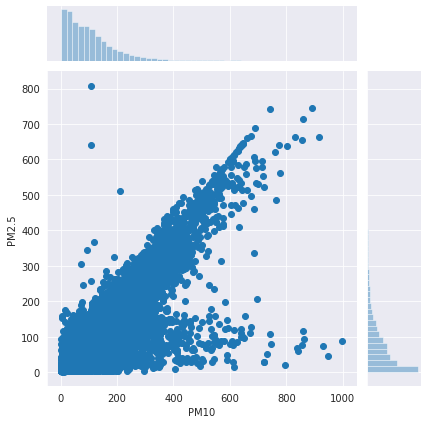

In [18]:
sns.jointplot(x="PM10", y="PM2.5", data=dados)

<p>Vamos imprimir um mapa de calor que mostra o quanto nossas variaveis são correlacionais</p>

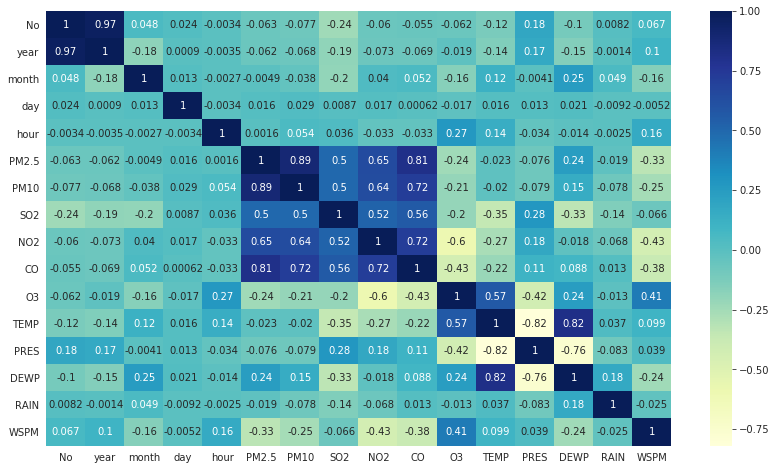

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(dados.corr(method='spearman'), annot=True, cmap="YlGnBu")

<p>De fato há uma alta correlação entre PM2.5 e PM10, mas também podemos observar que quase todas as emissões são correlacionadas entre si.</p>

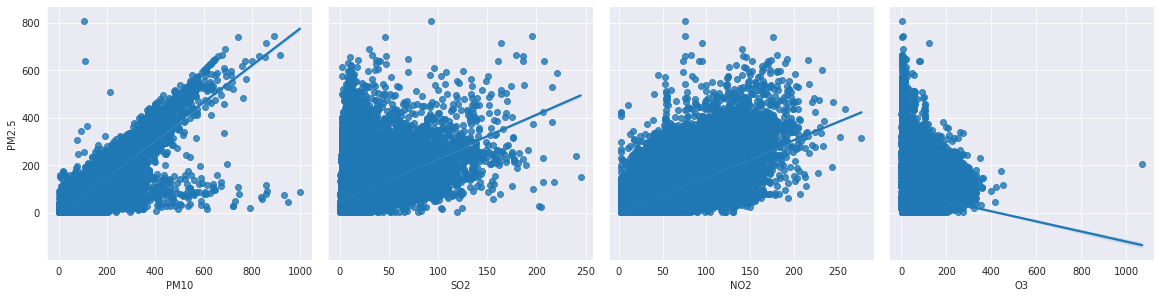

In [20]:
sns.pairplot(y_vars="PM2.5", x_vars=["PM10", "SO2", "NO2", "O3"], data=dados, kind='reg', height=4 )

<p>Vamos ver se a data interfere nas emissões, para isso vamos juntar as informações sobre dia/mes/ano em uma coluna e também criar uma nova coluna chamada ordinal_date que irá guardar o timestamp que será usado nas predições</p>

In [21]:
dados['full_date'] = pd.to_datetime(dados[['year', 'month', 'day']])
dados['ordinal_date'] = dados['full_date'].apply(lambda x: x.toordinal())
dados.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,full_date,ordinal_date
310625,30114,2016,8,6,17,103.0,115.0,2.0,24.0,1100.0,157.0,32.2,999.2,24.3,0.0,S,2.9,Wanshouxigong,2016-08-06,736182
65907,30844,2016,9,6,3,28.0,42.0,2.0,72.0,700.0,2.0,20.4,1005.6,16.8,0.0,NNE,1.0,Dongsi,2016-09-06,736213
27145,27146,2016,4,5,1,119.0,184.0,17.0,59.0,900.0,48.0,13.9,1003.1,4.2,0.0,SW,0.9,Gucheng,2016-04-05,736059
57091,22028,2015,9,4,19,39.0,39.0,2.0,34.0,1900.0,63.0,19.4,1007.2,18.9,0.9,E,1.8,Dongsi,2015-09-04,735845
134221,29030,2016,6,22,13,77.0,77.0,2.0,21.0,600.0,180.0,30.7,992.5,20.0,0.0,SE,1.8,Dingling,2016-06-22,736137


<h1>Iniciando as predições</h1>

<p>Vamos criar nosso modelo linear que irá tentar prever a emissão de PM2.5 ao longo do tempo</p>

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm 
from datetime import datetime, date

In [23]:
dados.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,full_date,ordinal_date
310625,30114,2016,8,6,17,103.0,115.0,2.0,24.0,1100.0,157.0,32.2,999.2,24.3,0.0,S,2.9,Wanshouxigong,2016-08-06,736182
65907,30844,2016,9,6,3,28.0,42.0,2.0,72.0,700.0,2.0,20.4,1005.6,16.8,0.0,NNE,1.0,Dongsi,2016-09-06,736213
27145,27146,2016,4,5,1,119.0,184.0,17.0,59.0,900.0,48.0,13.9,1003.1,4.2,0.0,SW,0.9,Gucheng,2016-04-05,736059
57091,22028,2015,9,4,19,39.0,39.0,2.0,34.0,1900.0,63.0,19.4,1007.2,18.9,0.9,E,1.8,Dongsi,2015-09-04,735845
134221,29030,2016,6,22,13,77.0,77.0,2.0,21.0,600.0,180.0,30.7,992.5,20.0,0.0,SE,1.8,Dingling,2016-06-22,736137


In [24]:
dados.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'full_date', 'ordinal_date'],
      dtype='object')

<p>Concatenando nosso DF com as colunas de stations</p>

In [25]:
dados = pd.concat([dados, stations], axis=1)

In [26]:
dados.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'full_date', 'ordinal_date', 'Aotizhongxin', 'Changping', 'Dingling',
       'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi',
       'Tiantan', 'Wanliu', 'Wanshouxigong'],
      dtype='object')

In [27]:
colunas = ['PM10', "SO2", "NO2", "CO", "O3", "ordinal_date", 'year', 'month', 'day', 'hour', 'Aotizhongxin', 'Changping', 'Dingling',
       'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi',
       'Tiantan', 'Wanliu', 'Wanshouxigong']

In [28]:
X = dados[colunas]
y = dados['PM2.5']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3> Primeiro vamos ver o que o statusmodel nos diz sobre os dados </h3>

In [30]:
X_train_com_constante = sm.add_constant(X_train)

In [31]:
X_train_com_constante.head()

,const,PM10,SO2,NO2,CO,O3,ordinal_date,year,month,day,...,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
241556,1.0,59.0,2.0,67.0,800.0000,13.0,736226,2016,9,19,...,0,0,1,0,0,0,0,0,0,0
393299,1.0,103.0,64.0,60.0,1700.0000,9.0,735244,2014,1,11,...,0,0,0,0,0,0,1,0,0,0
208886,1.0,20.0,2.0,8.0,1014.8488,64.0,736326,2016,12,28,...,0,0,0,0,1,0,0,0,0,0
25645,1.0,38.0,23.0,49.0,1200.0000,50.0,735996,2016,2,2,...,0,0,0,1,0,0,0,0,0,0
60334,1.0,22.0,10.0,35.0,300.0000,46.0,735980,2016,1,17,...,0,1,0,0,0,0,0,0,0,0


In [32]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [33]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8453.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:26:15   Log-Likelihood:            -1.7141e+05
No. Observations:               35000   AIC:                         3.429e+05
Df Residuals:                   34978   BIC:                         3.431e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1696.7864    355.009      4.780

<p>Podemos tirar algumas conclusões com com os dados que o StatsModel nos retornou:<p>
<p> A informação sobre a estação em que foi realizada a medição não irá ajudar muito nosso modelo, pois em vários casos está acima de 5% e em outros está abaixo, por este motivo iremos remover esta informação antes de treinar nosso modelo.</p>

<p>As variáveis referente a emissão de outros gases, bem como as que são referente a data tem o p valor &lt; 0, porém informações como dia, mês, ano e hora não fará muito sentido para nosso modelo pois estamos usando a variavel ordinal_date, assim iremos novamente rodar o statusmodel sem estas variaveis, caso o retorno será o mesmo, iremos proceder com o modelo utilizando apenas a variavel ordinal_date</p>  

<p>Nosso R² (R-squared) está em, ou seja  o modelo linear explica 83%, da variância da variável dependente a partir do regressores (variáveis independentes) incluídas no nosso modelo linear. </p>

<p>Vamos atualizar nossa lista de variáveis independentes e rodar o statusmodel de novo<p>

In [34]:
colunas = ['PM10', "SO2", "NO2", "CO", "O3", "ordinal_date"]

In [35]:
X = dados[colunas]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X_train_com_constante = sm.add_constant(X_train)

In [38]:
X_train_com_constante.head()

,const,PM10,SO2,NO2,CO,O3,ordinal_date
241556,1.0,59.0,2.0,67.0,800.0000,13.0,736226
393299,1.0,103.0,64.0,60.0,1700.0000,9.0,735244
208886,1.0,20.0,2.0,8.0,1014.8488,64.0,736326
25645,1.0,38.0,23.0,49.0,1200.0000,50.0,735996
60334,1.0,22.0,10.0,35.0,300.0000,46.0,735980


In [39]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [40]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 2.882e+04
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:26:15   Log-Likelihood:            -1.7180e+05
No. Observations:               35000   AIC:                         3.436e+05
Df Residuals:                   34993   BIC:                         3.437e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -307.1292    319.343     -0.962   

<p>Conforme tabla acima, podemos verificar que as remoções não tiveram grande impacto no nosso modelo, o nosso R² 
    continua em 83% e o p value das nossas variáveis continuam abaixo de 5% </p>

<h2>Treinando o modelo de Regressão Linear </h2>

In [41]:
modelo = LinearRegression()

In [42]:
X_train_com_constante = sm.add_constant(X_train)

In [43]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print("R² de treino = {}".format(modelo.score(X_train, y_train).round(2)))

R² de treino = 0.83


In [47]:
index = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'ordinal_date']

In [49]:
pd.DataFrame(modelo.coef_.round(3), index=index, columns=["Valores"])

,Valores
PM10,0.582
SO2,0.010
NO2,0.087
CO,0.021
O3,0.043
ordinal_date,0.000


<ul> <strong>Explicando os Coefs</strong>
    <li>Mantendo constante o valor das outras variaveis se o PM10 aumentar em 1, a PM2.5 sobe em média 0.55</li>
    <li>Mantendo constante o valor das outras variaveis se o SO2 aumentar em 1, a PM2.5 sobe em média 0.03</li>
    <li>Mantendo constante o valor das outras variaveis se o NO2 aumentar em 1, a PM2.5 sobe em média 0.14</li>
    <li>Mantendo constante o valor das outras variaveis se o CO aumentar em 1, a PM2.5 sobe em média 0.02</li>
    <li>Mantendo constante o valor das outras variaveis se o O3 aumentar em 1, a PM2.5 sobe em média 0.065</li>
    <li>Ao que parece a data não tem efeito sobre a emissão de PM2.5, porém temos que tem em mente que estamos usando a data em formato numério e não em datetime</li>
</ul>

<h3>Validando o modelo</h3>

In [50]:
y_train_pred = modelo.predict(X_train)
residuos = y_train - y_train_pred

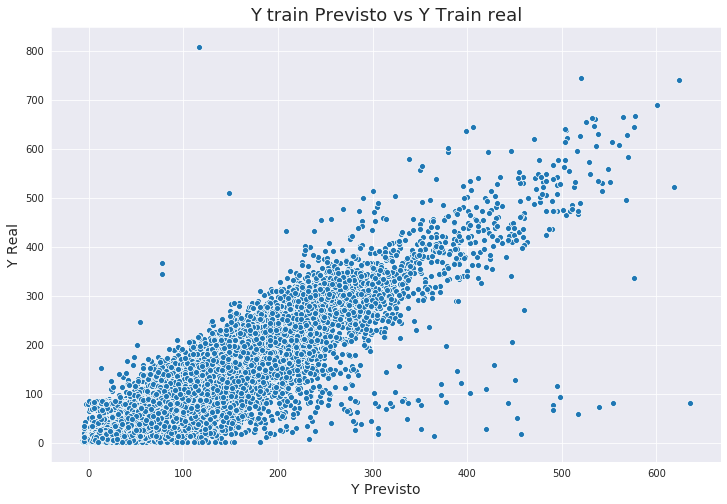

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_train_pred, y=y_train)
plt.title("Y train Previsto vs Y Train real", fontsize=18)
plt.xlabel("Y Previsto", fontsize=14)
plt.ylabel("Y Real", fontsize=14)
plt.show()

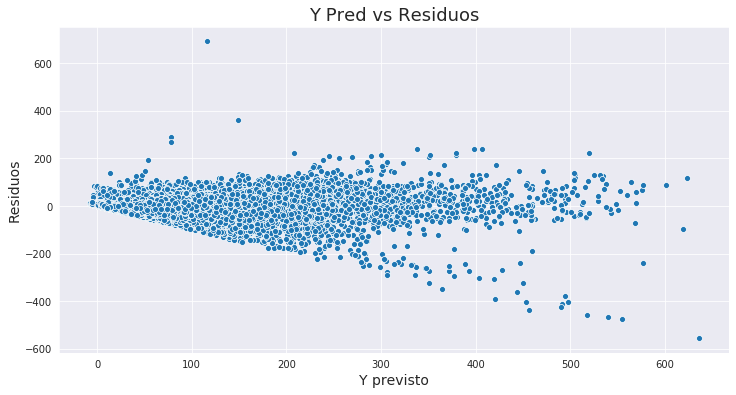

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=residuos, x=y_train_pred)
plt.title("Y Pred vs Residuos", fontsize=18)
plt.ylabel("Residuos", fontsize=14)
plt.xlabel("Y previsto", fontsize=14)
plt.show()


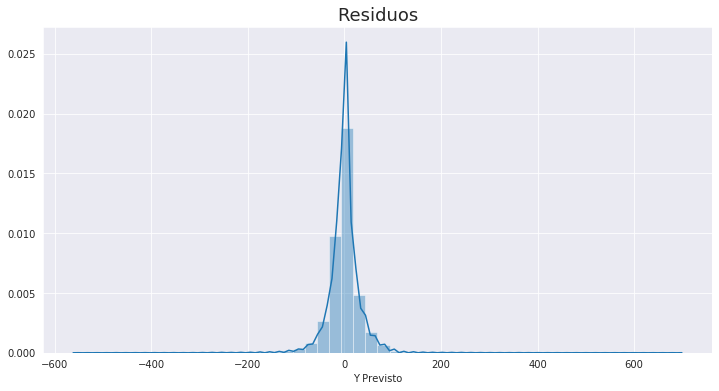

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(residuos)
plt.title("Residuos", fontsize=18)
plt.xlabel("Y Previsto")
plt.show()

In [54]:
predit = modelo.predict(X_test)

In [55]:
print("R² de teste = {}".format(metrics.r2_score(y_test, predit).round(2)))

R² de teste = 0.83


In [56]:
MSE = metrics.mean_squared_error(y_test, predit).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, predit)).round(2)
R2_2 = metrics.r2_score(y_test, predit).round(2)
MAE = metrics.median_absolute_error(y_test, predit).round(2)
SCORE = modelo.score(X_test, y_test).round(2)

pd.DataFrame([MSE, REQM_2, MAE, R2_2, SCORE], index=["MSE", "REQM", "MAE", "R²", "SCORE"], columns=["Valores"])

,Valores
MSE,1060.24
REQM,32.56
MAE,12.48
R²,0.83
SCORE,0.83


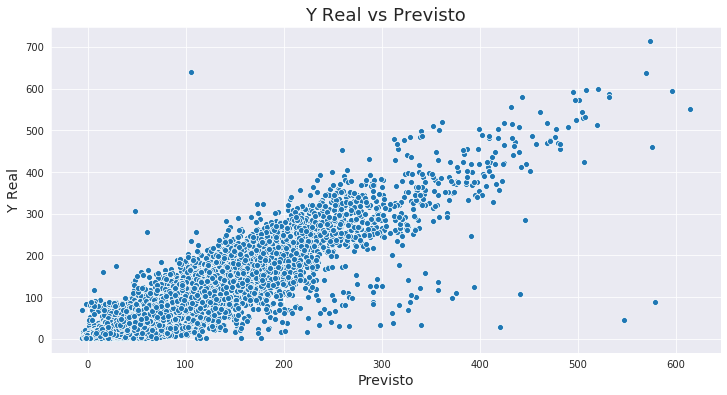

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=y_test, x=predit)
plt.title("Y Real vs Previsto", fontsize=18)
plt.ylabel("Y Real", fontsize=14)
plt.xlabel("Previsto", fontsize=14)
plt.show()

In [58]:
residuos= y_test - predit

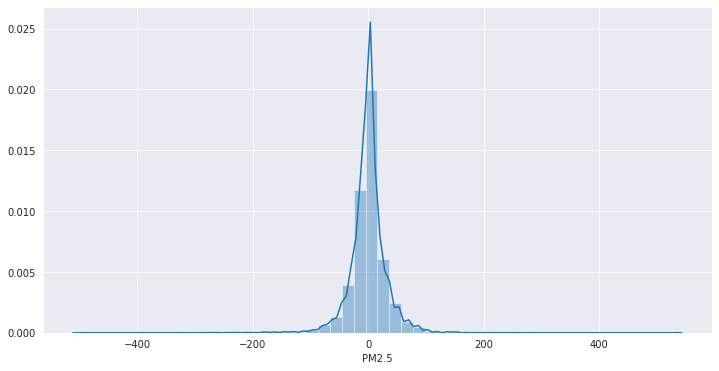

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(residuos)

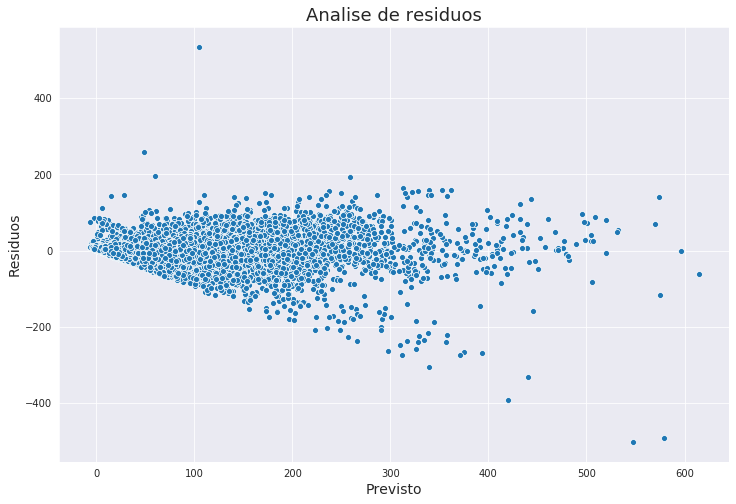

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=predit, y=residuos)
plt.ylabel("Residuos", fontsize=14)
plt.xlabel("Previsto", fontsize=14)
plt.title("Analise de residuos", fontsize=18)
plt.show()

A analise de resiuos mostra que os erros não têm uma variância constante, configurando assim uma [homoscedasticidade](https://pt.wikipedia.org/wiki/Heteroscedasticidade#:~:text=Ou%20seja%2C%20este%20postulado%20%C3%A9,perante%20um%20modelo%20econom%C3%A9trico%20regredido.). Sera preciso melhorar o modelo.

### Vamos tentar gerar outros modelos utilizando o método PCA e RFE

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
pca.explained_variance_ratio_

array([0.87322796, 0.12139639])

In [64]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [65]:
print(f"Shape do X original: {X_train.shape}, Shape pós redução de dimensionalidade com PCA: {X_test_pca.shape}")

Shape do X original: (35000, 6), Shape pós redução de dimensionalidade com PCA: (15000, 2)


In [66]:
modelo_pca = LinearRegression()
modelo_pca.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred_pca = modelo_pca.predict(X_test_pca)

In [68]:
erro_pca = metrics.mean_squared_error(y_pred=y_pred_pca, y_true=y_test)
print(f"Erro normal utilizando pca: ", erro_pca.round(2))

Erro normal utilizando pca:  2470.41


#### RFE

In [69]:
from sklearn.feature_selection import RFE

In [70]:
rfe = RFE(modelo)

In [71]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [72]:
pd.DataFrame({'coluna':X_train.columns,
              'bool': rfe.get_support(),
              'coeficientes': pd.Series(modelo.coef_)})

,coluna,bool,coeficientes
0,PM10,True,0.582030
1,SO2,False,0.010094
2,NO2,True,0.086824
3,CO,False,0.020658
4,O3,True,0.042697
5,ordinal_date,False,0.000399


In [73]:
X_train_importante = rfe.transform(X_train)
X_test_importante = rfe.transform(X_test)

In [74]:
modelo.fit(X_train_importante, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred_imp = modelo.predict(X_test_importante)

In [76]:
erro_imp = metrics.mean_squared_error(y_pred=y_pred_imp, y_true=y_test)
print(f"Erro normal utilizando o RFE: ", erro_imp.round(3))

Erro normal utilizando o RFE:  1326.905


Comparando o erro normal dos três modelos:

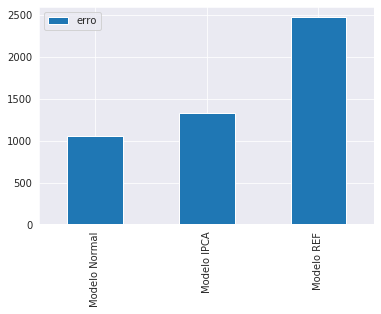

In [77]:
pd.DataFrame({'erro' : [MSE, erro_imp, erro_pca]}).plot(kind = 'bar')
plt.xticks(np.arange(3), ['Modelo Normal', "Modelo IPCA", "Modelo REF"])

plt.show()

Três abordagens foram tentadas, na primeira utilizando um modelo criado da forma recorrente, o segundo utilizando um modo não supervisionado de redução de dimensionalidade, e o terceiro usando outra forma não supervisionada de redução de features, porém o modelo que teve melhor performace foi o primeiro, se considerarmos o erro normal (ou erro do quadrado médio)